In [1]:
## list of sports for both men and women:
#Athletics, Gymnastics, Alpine Skiing, Cross Country Skiing, Rowing, Sailing, Shooting, Swimming, Wrestling
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

### The data clean up

In [2]:
# The path to our CSV file
file = "Resources/original_olympic_data.csv"

# Read our data into pandas
df = pd.read_csv(file)
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
#Viewing the columns
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

### Organizing Content to compare women vs. men in the USA from 1896 to 2016

In [4]:
#Selecting the columns
starter_olympics_df = df.loc[:, ['Name', 'Sex', 'Age', 'Team', 'NOC',
                                'Year', 'Sport', 'Event', 'Medal']]
starter_olympics_df.head()

#Select only USA participants
usa_filter = starter_olympics_df[(starter_olympics_df["NOC"] == "USA")]
usa_filter.head()

#drop duplicates based off of the name
usa_clean = usa_filter.drop_duplicates(subset=['Name'])
usa_clean.head()

#Checking for any Nan values on columns to be used
#usa_clean['NOC'].isnull().values.any()

,Name,Sex,Age,Team,NOC,Year,Sport,Event,Medal
10,Per Knut Aaland,M,31.0,United States,USA,1992,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
18,John Aalberg,M,31.0,United States,USA,1992,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
186,Stephen Anthony Abas,M,26.0,United States,USA,2004,Wrestling,"Wrestling Men's Featherweight, Freestyle",Silver
273,"David ""Dave"" Abbott",M,26.0,United States,USA,1928,Athletics,"Athletics Men's 5,000 metres",NaN
276,Jeremy Abbott,M,24.0,United States,USA,2010,Figure Skating,Figure Skating Men's Singles,NaN


In [5]:
#Creating seperate data frames for men and women to then plot on line plot
usa_women = usa_clean[(usa_clean['Sex'] == "F")]
usa_women_counts = usa_women.groupby(['Year'])['Sex'].apply(lambda x: x[x.str.contains('F')].count())
usa_women_counts_df = pd.DataFrame(data=usa_women_counts)
final_women_counts = usa_women_counts_df.reset_index()
final_women_counts.head()


usa_men = usa_clean[(usa_clean['Sex'] == "M")]
usa_men_counts = usa_men.groupby(['Year'])['Sex'].apply(lambda x: x[x.str.contains('M')].count())
usa_men_counts_df = pd.DataFrame(data=usa_men_counts)
final_men_counts = usa_men_counts_df.reset_index()
final_men_counts.head()

,Year,Sex
0,1896,14
1,1900,66
2,1904,508
3,1906,20
4,1908,98


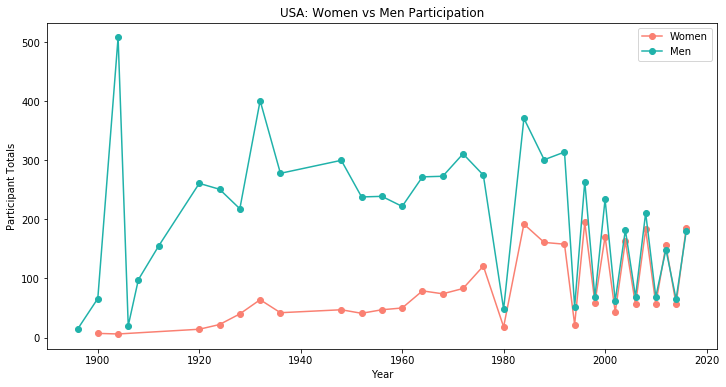

In [6]:
# Creating a line plot to compare women vs men in the USA

women_xaxis = final_women_counts["Year"]
women_yaxis = final_women_counts["Sex"]

men_xaxis = final_men_counts["Year"]
men_yaxis = final_men_counts["Sex"]

#This will adjust the size of the plot line, gotta set the variable first
#and then adjust the height and width
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(6)

women_line = plt.plot(women_xaxis, women_yaxis, marker ='o', color='salmon', label="Women",)
men_line = plt.plot(men_xaxis, men_yaxis, marker ='o', color='lightseagreen', label="Men")
#plt.xticks(men_xaxis, men_xaxis, rotation ='vertical')
#plt.figure(figsize=(8,10))
plt.title("USA: Women vs Men Participation")
plt.xlabel("Year")
plt.ylabel("Participant Totals")
plt.legend(loc="upper right")
plt.savefig("Visualizations/usa-pop.png")


#### Plot Notes: 
<p>In this line plot we are comparing women's participation along with men's participation within the USA. We can see that men joined the olympics before women and women didn't really start to participate till the 1900s. If we compare the date of the 1920s when women's right to vote began, we can see an uptick in participation and steady continuation in growth which could have also played a large role in part by the influece of the women's rights movement (women's liberation movement) of the 1960's and '70's. After the 1980s we can really see the largets growth compared to past dates and as we move on the 2000s participation between men and women begins to align more closely.  </p>

### How do other world powers compare to the US when it comes to women's participation?

#### Analyzing China

In [7]:
#Select only Chinese participants
chn_filter = starter_olympics_df[(starter_olympics_df["NOC"] == "CHN")]
chn_filter.head()

#drop duplicates based off of the name
chn_clean = chn_filter.drop_duplicates(subset=['Name'])
chn_clean.head()

#Checking for any Nan values on columns to be used
#chn_clean['Name'].isnull().values.any()

,Name,Sex,Age,Team,NOC,Year,Sport,Event,Medal
0,A Dijiang,M,24.0,China,CHN,1992,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,China,CHN,2012,Judo,Judo Men's Extra-Lightweight,NaN
1072,Abudoureheman,M,22.0,China,CHN,2000,Boxing,Boxing Men's Middleweight,NaN
2611,Ai Linuer,M,25.0,China,CHN,2004,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN
2612,Ai Yanhan,F,14.0,China,CHN,2016,Swimming,Swimming Women's 200 metres Freestyle,NaN


In [8]:
#Creating seperate data frames for men and women to then plot on line plot for China
chn_women = chn_clean[(chn_clean['Sex'] == "F")]
chn_women_counts = chn_women.groupby(['Year'])['Sex'].apply(lambda x: x[x.str.contains('F')].count())
chn_women_counts_df = pd.DataFrame(data=chn_women_counts)
chn_women_finals = chn_women_counts_df.reset_index()
chn_women_finals

chn_men = chn_clean[(chn_clean['Sex'] == "M")]
chn_men_counts = chn_men.groupby(['Year'])['Sex'].apply(lambda x: x[x.str.contains('M')].count())
chn_men_counts_df = pd.DataFrame(data=chn_men_counts)
chn_men_finals = chn_men_counts_df.reset_index()
chn_men_finals.head()

,Year,Sex
0,1932,1
1,1936,51
2,1948,29
3,1980,13
4,1984,141


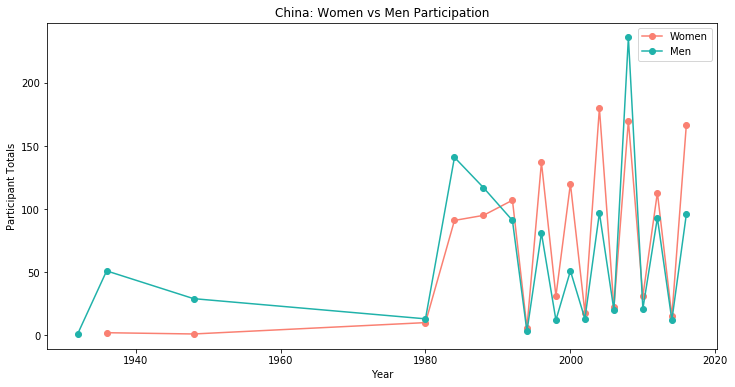

In [9]:
# Creating a line plot to compare women vs men in the China

chn_women_xaxis = chn_women_finals["Year"]
chn_women_yaxis = chn_women_finals["Sex"]

chn_men_xaxis = chn_men_finals["Year"]
chn_men_yaxis = chn_men_finals["Sex"]

#This will adjust the size of the plot line, gotta set the variable first
#and then adjust the height and width
chn = plt.figure()
chn.set_figwidth(12)
chn.set_figheight(6)

chn_women_line = plt.plot(chn_women_xaxis, chn_women_yaxis, marker ='o', color='salmon', label="Women",)
chn_men_line = plt.plot(chn_men_xaxis, chn_men_yaxis, marker ='o', color='lightseagreen', label="Men")
#plt.xticks(men_xaxis, men_xaxis, rotation ='vertical')
#plt.figure(figsize=(8,10))
plt.title("China: Women vs Men Participation")
plt.xlabel("Year")
plt.ylabel("Participant Totals")
plt.legend(loc="upper right")

plt.savefig("Visualizations/chn-pop.png")

#### Plot Notes
<p>Men were the first ones to begin participation in the olympics and women soon followed. It can also be observed that both men and women didn't participate as much as the USA did. This could possibly be due to government restrictions depending on what was going on at the time and what types of rules the government had imposed. Participation didn't increase until the 1980s for both men and women and based off of the line plot it can be observed that women were participating more than men at times during the late 1990s into the 2000s</p>

<p>*** Side Note: China had undergone a Chinese Civil War between the dates of 1927 and 1949 which could have lead to the lack of participation.</p>

#### Analyzing Russia

In [10]:
#Select only Russian participants
rus_filter = starter_olympics_df[(starter_olympics_df["NOC"] == "RUS")]
rus_filter.head()

#drop duplicates based off of the name
rus_clean = rus_filter.drop_duplicates(subset=['Name'])
rus_clean.head()

#Checking for any Nan values on columns to be used
#rus_clean['Name'].isnull().values.any()

,Name,Sex,Age,Team,NOC,Year,Sport,Event,Medal
163,Mariya Vasilyevna Abakumova (-Tarabina),F,22.0,Russia,RUS,2008,Athletics,Athletics Women's Javelin Throw,Silver
195,Tamila Rashidovna Abasova,F,21.0,Russia,RUS,2004,Cycling,Cycling Women's Sprint,Silver
615,Adlan Aliyevich Abdurashidov,M,26.0,Russia,RUS,2016,Boxing,Boxing Men's Lightweight,NaN
779,Inga Eduardovna Abitova,F,26.0,Russia,RUS,2008,Athletics,"Athletics Women's 10,000 metres",NaN
788,Denis Mikhaylovich Ablyazin,M,19.0,Russia,RUS,2012,Gymnastics,Gymnastics Men's Team All-Around,NaN


In [11]:
#Creating seperate data frames for men and women to then plot on line plot for China
rus_women = rus_clean[(rus_clean['Sex'] == "F")]
rus_women_counts = rus_women.groupby(['Year'])['Sex'].apply(lambda x: x[x.str.contains('F')].count())
rus_women_counts_df = pd.DataFrame(data=rus_women_counts)
rus_women_finals = rus_women_counts_df.reset_index()
rus_women_finals

rus_men = rus_clean[(rus_clean['Sex'] == "M")]
rus_men_counts = rus_men.groupby(['Year'])['Sex'].apply(lambda x: x[x.str.contains('M')].count())
rus_men_counts_df = pd.DataFrame(data=rus_men_counts)
rus_men_finals = rus_men_counts_df.reset_index()
rus_men_finals.head()

,Year,Sex
0,1900,4
1,1908,6
2,1912,158
3,1924,2
4,1994,75


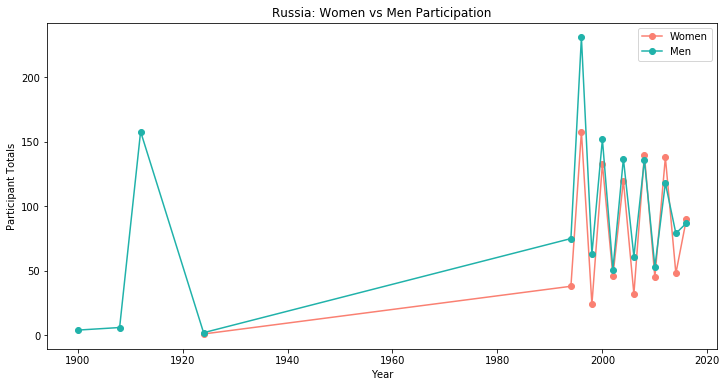

In [12]:
# Creating a line plot to compare women vs men in the Russia

rus_women_xaxis = rus_women_finals["Year"]
rus_women_yaxis = rus_women_finals["Sex"]

rus_men_xaxis = rus_men_finals["Year"]
rus_men_yaxis = rus_men_finals["Sex"]

#This will adjust the size of the plot line, gotta set the variable first
#and then adjust the height and width
rus = plt.figure()
rus.set_figwidth(12)
rus.set_figheight(6)

rus_women_line = plt.plot(rus_women_xaxis, rus_women_yaxis, marker ='o', color='salmon', label="Women",)
rus_men_line = plt.plot(rus_men_xaxis, rus_men_yaxis, marker ='o', color='lightseagreen', label="Men")
#plt.xticks(men_xaxis, men_xaxis, rotation ='vertical')
#plt.figure(figsize=(8,10))
plt.title("Russia: Women vs Men Participation")
plt.xlabel("Year")
plt.ylabel("Participant Totals")
plt.legend(loc="upper right")

plt.savefig("Visualizations/rus-pop.png")

#### Plot Notes:
<p>It can be seen from the chart above that many Russians did not participate for many years in the olympics. Much of this is in ralation to their doping violations.</p>

#### Analyzing Japan

In [13]:
#Select only Japanese participants
jpn_filter = starter_olympics_df[(starter_olympics_df["NOC"] == "JPN")]
jpn_filter.head()

#drop duplicates based off of the name
jpn_clean = jpn_filter.drop_duplicates(subset=['Name'])
jpn_clean.head()

#Checking for any Nan values on columns to be used
#jpn_clean['Name'].isnull().values.any()

,Name,Sex,Age,Team,NOC,Year,Sport,Event,Medal
625,Isao Ko Abe,M,24.0,Japan,JPN,1936,Athletics,Athletics Men's Hammer Throw,NaN
626,Kazumi Abe,M,24.0,Japan-1,JPN,1972,Bobsleigh,Bobsleigh Men's Two,NaN
630,Kazuo Abe,M,25.0,Japan,JPN,1960,Wrestling,"Wrestling Men's Lightweight, Freestyle",NaN
631,Kinya Abe,M,23.0,Japan,JPN,1992,Fencing,"Fencing Men's Foil, Individual",NaN
632,Kiyoshi Abe,M,25.0,Japan,JPN,1972,Wrestling,"Wrestling Men's Featherweight, Freestyle",NaN


In [14]:
#Creating seperate data frames for men and women to then plot on line plot for Japan
jpn_women = jpn_clean[(jpn_clean['Sex'] == "F")]
jpn_women_counts = jpn_women.groupby(['Year'])['Sex'].apply(lambda x: x[x.str.contains('F')].count())
jpn_women_counts_df = pd.DataFrame(data=jpn_women_counts)
jpn_women_finals = jpn_women_counts_df.reset_index()
jpn_women_finals

jpn_men = jpn_clean[(jpn_clean['Sex'] == "M")]
jpn_men_counts = jpn_men.groupby(['Year'])['Sex'].apply(lambda x: x[x.str.contains('M')].count())
jpn_men_counts_df = pd.DataFrame(data=jpn_men_counts)
jpn_men_finals = jpn_men_counts_df.reset_index()
jpn_men_finals.head()

,Year,Sex
0,1912,2
1,1920,14
2,1924,17
3,1928,42
4,1932,145


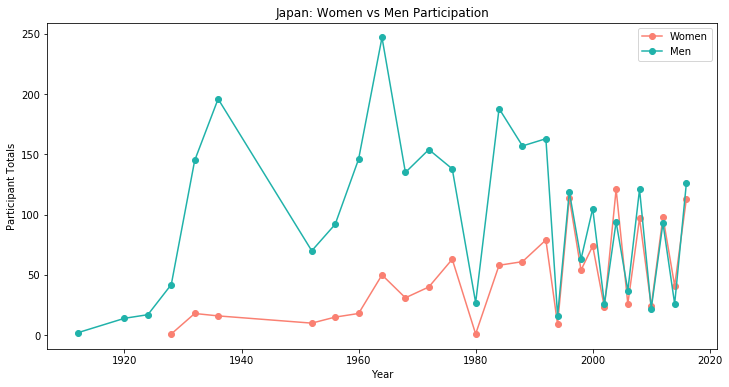

In [15]:
# Creating a line plot to compare women vs men in the Russia

jpn_women_xaxis = jpn_women_finals["Year"]
jpn_women_yaxis = jpn_women_finals["Sex"]

jpn_men_xaxis = jpn_men_finals["Year"]
jpn_men_yaxis = jpn_men_finals["Sex"]

#This will adjust the size of the plot line, gotta set the variable first
#and then adjust the height and width
jpn = plt.figure()
jpn.set_figwidth(12)
jpn.set_figheight(6)

jpn_women_line = plt.plot(jpn_women_xaxis, jpn_women_yaxis, marker ='o', color='salmon', label="Women",)
jpn_men_line = plt.plot(jpn_men_xaxis, jpn_men_yaxis, marker ='o', color='lightseagreen', label="Men")
#plt.xticks(men_xaxis, men_xaxis, rotation ='vertical')
#plt.figure(figsize=(8,10))
plt.title("Japan: Women vs Men Participation")
plt.xlabel("Year")
plt.ylabel("Participant Totals")
plt.legend(loc="upper right")

plt.savefig("Visualizations/jpn-pop.png")